## Example 4.3: Gambler’s Problem
- A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. 
- If the coin comes up heads, gambler wins as many dollars as the stake on that flip
- If the coin comes up tails, gambler loses the stake.
- The game ends when the gambler wins by reaching goal of $100 or loses by running out of money
- On each flip, the gambler must decide what portion of capital to stake, in integer numbers of dollars.

In [94]:
import matplotlib.pyplot as plt

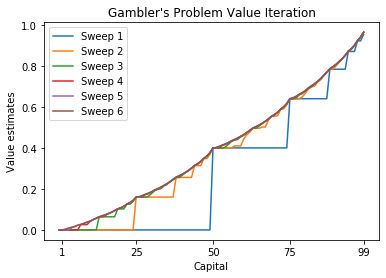

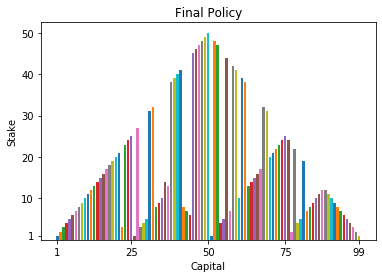

In [95]:
##############
# Initialize #
##############

# goal 
goal = 100

# State value function
V = [0] * (goal+1)

# Policy for actions
policy = [[min(j, goal - j) for j in range(i)] for i in range(1, goal+1)]

# Policy pi 
pi = [[min(j, goal - j) for j in range(i)] for i in range(1, goal+1)]

# Delta < Theta condition
delta = theta = 0.01

# probability of heads
heads = 0.4

# tails
tails = 1 - heads

# sweeps
sweeps = []

#############################
# Loop until delta < theta: #
#############################
while delta >= theta:

    # delta <- 0
    delta = 0
    
    # Add to sweep
    sweeps.append(V.copy())
    
    ########################
    # loop for each s of S #
    ########################
    for s in range(1, goal):

        # v <- V (s)
        v = V[s]
        
        # keep track of actions, values
        q = {}
        
        # test each action
        for a in policy[s]:
            
            # Casino
            win = goal if s+a > goal else s+a
            lose = 0 if s-a < 0 else s-a
            
            # reward
            r = 0 if win < goal else 1
            
            #############################################
            # V(s) max_a p(s', r|s, a)[r + Gamma*V(s')] #
            #############################################
            q[a] = heads*(r + V[win]) + tails*(0 + V[lose])

        # place the max value in state
        V[s] = max(q.values()) 
        
        # Start new policy
        pi[s] = [action for action, value in q.items() if value == max(q.values())]

        ###################################
        # delta <- max(delta, |v - V(s)|) #
        ###################################
        delta = max(delta, abs(v - V[s]))

# add last sweep
sweeps.append(V)        

########################
# loop for each s of S #
########################
for s in range(1, goal):

    # keep track of actions, values
    q = {}

    # test each action
    for a in pi[s]:

        # Casino
        win = goal if s+a > goal else s+a
        lose = 0 if s-a < 0 else s-a

        # reward
        r = 0 if win < goal else 1

        #############################################
        # V(s) max_a p(s', r|s, a)[r + Gamma*V(s')] #
        #############################################
        q[a] = heads*(r + V[win]) + tails*(0 + V[lose])

    #######################################################
    # Pi(s) = argmax_a SUM p(s', r|s, a)[r + Gamma*V(s')] #
    #######################################################
    policy[s] = [action for action, value in q.items() if value == max(q.values())]

# Final policy plotting
for sweep, v in enumerate(sweeps[1:]):
    plt.plot(v[:goal], label=f'Sweep {sweep+1}')
plt.xlabel("Capital")
plt.ylabel("Value estimates")
plt.xticks([1, 25, 50, 75, 99])
plt.title("Gambler's Problem Value Iteration")
plt.legend(loc="best")
plt.show()

for i in range(1, len(policy)):
    plt.bar(i, policy[i])
plt.xlabel("Capital")
plt.ylabel("Stake")
plt.title("Final Policy")
plt.xticks([1, 25, 50, 75, 99])
plt.yticks([1, 10, 20, 30, 40, 50])
plt.show()